In [ ]:
import pandas as pd

# Load data
df_train = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')
df_train = df_train.iloc[:, :-1]
df_train = df_train.drop_duplicates()

df_test = df_test.drop_duplicates()

# print(f"train shape: {df_train.shape}")
# print(f"After dropping duplicates: {df_train_cleaned.shape}")

# print(f"test shape: {df_test.shape}")
# print(f"After dropping duplicates: {df_test_cleaned.shape}")



In [129]:
"Traing Data"
X = df_train.drop(columns=["prognosis"])
Y = df_train["prognosis"]

"""Encoding Y"""
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_encoded = le.fit_transform(Y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Model
# model = RandomForestClassifier()

model = RandomForestClassifier()
model.fit(X, Y_encoded)

import joblib

joblib.dump(model, 'model1.pkl')




['model1.pkl']

In [131]:
from sklearn.model_selection import cross_val_score, KFold
import  numpy as np


le = LabelEncoder()
Y_encoded = le.fit_transform(Y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model,
                             X, Y_encoded, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


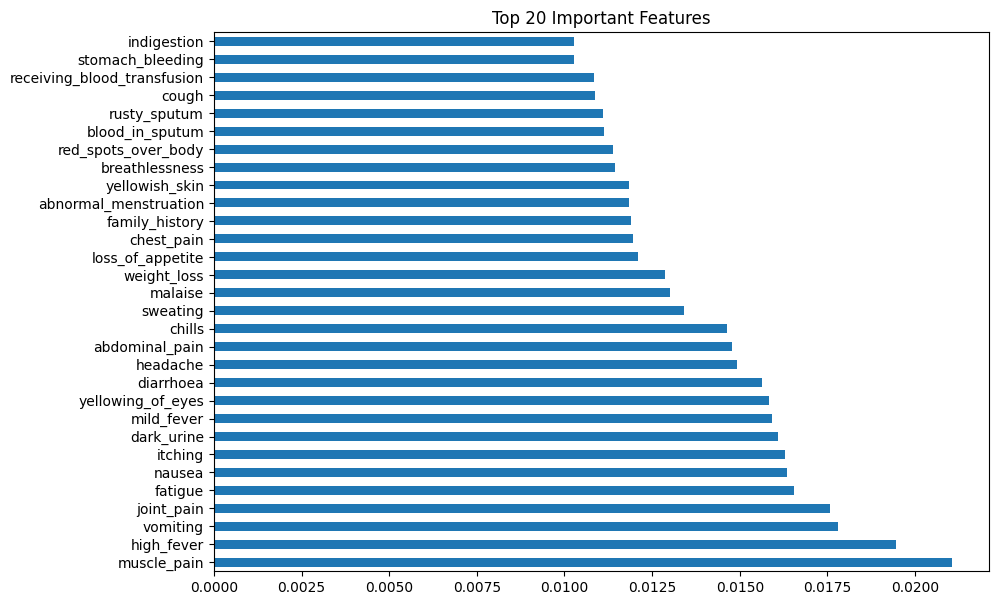

In [163]:
"""FEATURE DROP"""
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns
feat_importances = pd.Series(importances, index=features)

# Plot top 20
feat_importances.nlargest(30).plot(kind='barh', figsize=(10, 7))
plt.title("Top 20 Important Features")
plt.show()


In [155]:
"selectin top 20 featues"
top_features = feat_importances.nlargest(30).index
X_top = X[top_features]
print(X_top.iloc[1])

rf = RandomForestClassifier()
# Train/test with these features
rf.fit(X_top, Y_encoded)

"""PREDICTIONS"""
y_pred = rf.predict(X_top)
print("Accuracy:", accuracy_score(Y_encoded, y_pred))

import joblib

joblib.dump(rf, 'model30.pkl')

muscle_pain                    0
high_fever                     0
vomiting                       0
joint_pain                     0
fatigue                        0
nausea                         0
itching                        0
dark_urine                     0
mild_fever                     0
yellowing_of_eyes              0
diarrhoea                      0
headache                       0
abdominal_pain                 0
chills                         0
sweating                       0
malaise                        0
weight_loss                    0
loss_of_appetite               0
chest_pain                     0
family_history                 0
abnormal_menstruation          0
yellowish_skin                 0
breathlessness                 0
red_spots_over_body            0
blood_in_sputum                0
rusty_sputum                   0
cough                          0
receiving_blood_transfusion    0
stomach_bleeding               0
indigestion                    0
Name: 1, d

['model30.pkl']

In [138]:
X_TEST = df_test.drop(columns=["prognosis"])
Y_TEST = df_test["prognosis"]
from sklearn.preprocessing import LabelEncoder

le_test = LabelEncoder()
Y_test_encoded = le.fit_transform(Y_TEST)


In [139]:
"""PREDICTIONS"""
y_pred = model.predict(X_TEST)


In [140]:
# print("y_pred shape:", y_pred.shape)
# print("Y_test_encoded shape:", Y_test_encoded.shape)

# print("Accuracy:", accuracy_score(Y_test_encoded, y_pred))
print(classification_report(Y_test_encoded, y_pred, target_names=le.classes_))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [165]:
import pandas as pd
print(pd.Series(Y).value_counts())


prognosis
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma        

In [166]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Split first!
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)  # No unseen label error now
rf = RandomForestClassifier(class_weight='balanced')

# Grid search setup
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, y_train_encoded)

grid.fit(X_train, y_train_encoded)

# Output scores
print("CV Score on training data:", grid.best_score_)
print("Test score on unseen validation data:", grid.score(X_val, y_val_encoded))

# Save model & label encoder
joblib.dump(grid.best_estimator_, 'rf_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl') 


/Users/aryanbhandari/Documents/Sheetall/myenv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/aryanbhandari/Documents/Sheetall/myenv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV Score on training data: 1.0
Test score on unseen validation data: 1.0


['label_encoder.pkl']

In [142]:
"checking for accuracy 1.0 reasons"
import numpy as np
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))


{'(vertigo) Paroymsal  Positional Vertigo': np.int64(7), 'AIDS': np.int64(5), 'Acne': np.int64(5), 'Alcoholic hepatitis': np.int64(8), 'Allergy': np.int64(5), 'Arthritis': np.int64(6), 'Bronchial Asthma': np.int64(7), 'Cervical spondylosis': np.int64(6), 'Chicken pox': np.int64(10), 'Chronic cholestasis': np.int64(8), 'Common Cold': np.int64(9), 'Dengue': np.int64(10), 'Diabetes ': np.int64(9), 'Dimorphic hemmorhoids(piles)': np.int64(6), 'Drug Reaction': np.int64(6), 'Fungal infection': np.int64(5), 'GERD': np.int64(7), 'Gastroenteritis': np.int64(5), 'Heart attack': np.int64(5), 'Hepatitis B': np.int64(9), 'Hepatitis C': np.int64(7), 'Hepatitis D': np.int64(10), 'Hepatitis E': np.int64(9), 'Hypertension ': np.int64(6), 'Hyperthyroidism': np.int64(9), 'Hypoglycemia': np.int64(9), 'Hypothyroidism': np.int64(8), 'Impetigo': np.int64(6), 'Jaundice': np.int64(9), 'Malaria': np.int64(8), 'Migraine': np.int64(10), 'Osteoarthristis': np.int64(7), 'Paralysis (brain hemorrhage)': np.int64(5), 

In [159]:
# Predict on test set
y_pred = model.predict(X_TEST)
y_pred_labels = le.inverse_transform(y_pred)        # decoded prediction
actual_labels = Y_TEST.values                        # actual output

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Predicted Disease": y_pred_labels,
    "Actual Disease": actual_labels
})
comparison_df["Match"] = comparison_df["Predicted Disease"] == comparison_df["Actual Disease"]
print(comparison_df.head(20))


# Print full comparison or top few
print(comparison_df.head(20))

               Predicted Disease                Actual Disease  Match
0               Fungal infection              Fungal infection   True
1                        Allergy                       Allergy   True
2                           GERD                          GERD   True
3            Chronic cholestasis           Chronic cholestasis   True
4                  Drug Reaction                 Drug Reaction   True
5            Peptic ulcer diseae           Peptic ulcer diseae   True
6                           AIDS                          AIDS   True
7                      Diabetes                      Diabetes    True
8                Gastroenteritis               Gastroenteritis   True
9               Bronchial Asthma              Bronchial Asthma   True
10                 Hypertension                  Hypertension    True
11                      Migraine                      Migraine   True
12          Cervical spondylosis          Cervical spondylosis   True
13  Paralysis (brain

In [158]:
correct = comparison_df["Match"].sum()
total = len(comparison_df)
accuracy = correct / total * 100

print(f"\nCorrect Predictions: {correct}/{total}")
print(f"Calculated Accuracy: {accuracy:.2f}%")



Correct Predictions: 41/42
Calculated Accuracy: 97.62%


In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(12, 12))
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [42, 304]